In [394]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tqdm
pd.set_option('display.max_column', None)
pd.set_option('display.max_row', None)
from sklearn.ensemble import IsolationForest

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTENC


In [395]:
data = pd.read_csv(r"gsmarean_analysis_ns\data-phase2.csv", index_col=0)

In [396]:
data.shape

(2651, 36)

In [397]:
data.head()

,name,brand,2G,3G,4G,5G,Announced,Status,Weight,Length,Width,Diameter,SIM,Display Type,Display Size,ppi,body ratio,OS,battery_capacity,Price,CPU,ratio,pixel,WLAN,Colors,Sensors,Bluetooth,GPU,Loudspeaker,3.5mm jack,Chipset,Network,Internal,Card slot,RAM,Storage
0,alcatel 1b (2022),alcatel,True,True,True,False,2022.0,Available,172.0,146.7,71.9,10,Nano-SIM,TFT LCD,5.50,293.0,74.0,Android 11,3000.0,100.0,4.0,18:9,1036800.0,"Wi-Fi 802.11 b/g/n, Wi-Fi Direct","Prime Black, Atlantic Blue",Accelerometer,"5.0, A2DP",PowerVR GE8300,True,True,Mediatek MT6761 Helio A22 (12 nm),"GSM / HSPA / LTE HSPA 42.2/11.1 Mbps, LTE Cat4...",32GB 2GB RAM,microSDXC (dedicated slot),2.0,32.0
1,alcatel 1l pro (2021),alcatel,True,True,True,False,2021.0,Available,190.0,156.4,74.8,9.7,Nano-SIM,IPS LCD,6.10,282.0,78.1,Android 11,3000.0,110.0,8.0,5:9,1123200.0,"Wi-Fi 802.11 b/g/n, Wi-Fi Direct","Power Grey, Twilight Blue","Fingerprint (rear-mounted), accelerometer, pro...","4.2, A2DP",IMG8322,True,True,Unisoc SC9863A (28nm),"GSM / HSPA / LTE HSPA 21.1/5.76 Mbps, LTE Cat4...",32GB 2GB RAM,microSDXC (uses shared SIM slot),2.0,32.0
2,alcatel 1 (2021),alcatel,True,True,True,False,2021.0,Available,134.0,137.6,65.7,9.8,Nano-SIM,TFT LCD,5.00,215.0,71.4,Android 11,2000.0,60.0,4.0,18:9,460800.0,"Wi-Fi 802.11 b/g/n, Wi-Fi Direct","Volcano Black, AI Aqua","Accelerometer, proximity","4.2, A2DP, LE",PowerVR GE8100,True,True,Mediatek MT6739 (28 nm),"GSM / HSPA / LTE HSPA 42.2/11.5 Mbps, LTE Cat4...","8GB 1GB RAM, 16GB 1GB RAM",microSDHC (dedicated slot),1.0,8.0
3,alcatel 3l (2021),alcatel,True,True,True,False,2021.0,Available,194.0,165.6,75.6,8.7,Nano-SIM,IPS LCD,6.52,269.0,82.0,Android 11,4000.0,330.0,8.0,20:9,1152000.0,"Wi-Fi 802.11 b/g/n, Wi-Fi Direct","Jewelry Blue, Jewelry Black","Fingerprint (rear-mounted), accelerometer, pro...","5.0, A2DP, LE",PowerVR GE8320,True,True,Mediatek MT6762D Helio P22 (12 nm),"GSM / HSPA / LTE HSPA 42.2/5.76 Mbps, LTE Cat4...",64GB 4GB RAM,microSDXC (only single sim model),4.0,64.0
4,alcatel 1s (2021),alcatel,True,True,True,False,2021.0,Available,190.0,165.6,75.6,8.8,Nano-SIM,IPS LCD,6.52,269.0,82.0,Android 11,4000.0,130.0,8.0,20:9,1152000.0,"Wi-Fi 802.11 b/g/n, Wi-Fi Direct","Elegant Black, Twilight Blue","Fingerprint (rear-mounted), accelerometer, pro...","5.0, A2DP, LE",PowerVR GE8320,True,True,Mediatek MT6762D Helio P22 (12 nm),"GSM / HSPA / LTE HSPA 42.2/5.76 Mbps, LTE Cat4...",32GB 3GB RAM,microSDXC (uses shared SIM slot),3.0,32.0


### Pre-Processing... & Feature Engineering

In [398]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2651 entries, 0 to 4678
Data columns (total 36 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              2651 non-null   object 
 1   brand             2651 non-null   object 
 2   2G                2651 non-null   bool   
 3   3G                2651 non-null   bool   
 4   4G                2651 non-null   bool   
 5   5G                2651 non-null   bool   
 6   Announced         2651 non-null   float64
 7   Status            2651 non-null   object 
 8   Weight            2651 non-null   float64
 9   Length            2651 non-null   object 
 10  Width             2651 non-null   object 
 11  Diameter          2651 non-null   object 
 12  SIM               2651 non-null   object 
 13  Display Type      2651 non-null   object 
 14  Display Size      2651 non-null   float64
 15  ppi               2651 non-null   float64
 16  body ratio        2651 non-null   float64
 17  

In [399]:
data.columns.values

array(['name', 'brand', '2G', '3G', '4G', '5G', 'Announced', 'Status',
       'Weight', 'Length', 'Width', 'Diameter', 'SIM', 'Display Type',
       'Display Size', 'ppi', 'body ratio', 'OS', 'battery_capacity',
       'Price', 'CPU', 'ratio', 'pixel', 'WLAN', 'Colors', 'Sensors',
       'Bluetooth', 'GPU', 'Loudspeaker', '3.5mm jack', 'Chipset',
       'Network', 'Internal', 'Card slot', 'RAM', 'Storage'], dtype=object)

In [400]:
data['2G'].value_counts()

2G
True    2651
Name: count, dtype: int64

In [401]:
data['Status'].value_counts()

Status
Discontinued    1381
Available       1267
Coming             3
Name: count, dtype: int64

In [402]:
data.loc[data.Status == 'Coming','Status'] = 'Available'

In [403]:
data.Status.unique()

array(['Available', 'Discontinued'], dtype=object)

In [404]:
data.isna().sum()

name                  0
brand                 0
2G                    0
3G                    0
4G                    0
5G                    0
Announced             0
Status                0
Weight                0
Length                0
Width                 0
Diameter              0
SIM                   0
Display Type          0
Display Size          0
ppi                   0
body ratio            0
OS                    0
battery_capacity      0
Price                 0
CPU                 279
ratio                 0
pixel                 0
WLAN                  1
Colors                1
Sensors              19
Bluetooth             0
GPU                 224
Loudspeaker           0
3.5mm jack            0
Chipset             257
Network               0
Internal              0
Card slot             0
RAM                   0
Storage               0
dtype: int64

In [405]:
data['n_colors'] = data['Colors'].fillna(method='ffill').apply(lambda x : len(x.split(',')))

C:\Users\Snapp\AppData\Local\Temp\ipykernel_7072\2807774303.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data['n_colors'] = data['Colors'].fillna(method='ffill').apply(lambda x : len(x.split(',')))


In [406]:
data[~data['Sensors'].str.contains('accelerometer', case=False, na=False)].head()

,name,brand,2G,3G,4G,5G,Announced,Status,Weight,Length,Width,Diameter,SIM,Display Type,Display Size,ppi,body ratio,OS,battery_capacity,Price,CPU,ratio,pixel,WLAN,Colors,Sensors,Bluetooth,GPU,Loudspeaker,3.5mm jack,Chipset,Network,Internal,Card slot,RAM,Storage,n_colors
8,alcatel go flip 4,alcatel,True,True,True,False,2021.0,Available,133.0,107.3,55.6,19.9,Nano-SIM,TN TFT LCD,2.8,143.0,40.7,KaiOS 3.0,1850.0,120.0,4.0,4:3,76800.0,"Wi-Fi 802.11 b/g/n, hotspot",Midnight Blue,NaN,"4.2, A2DP",Adreno 308,True,True,QM215 Snapdragon 215 (28 nm),"GSM / HSPA / LTE HSPA, LTE",4GB 512MB RAM,microSDHC (dedicated slot),0.5,4.0,1
9,alcatel go flip 3,alcatel,True,True,True,False,2019.0,Available,118.0,104.9,53.1,20.1,Nano-SIM,TN TFT LCD,2.8,143.0,43.6,KaiOS 2.5.2,1350.0,80.0,4.0,4:3,76800.0,"Wi-Fi 802.11 b/g/n, hotspot",Prime Black,NaN,"4.2, A2DP",Adreno 304,True,True,Qualcomm MSM8909 Snapdragon 210 (28 nm),"GSM / CDMA / HSPA / LTE HSPA, LTE",4GB 512MB RAM,microSDHC (dedicated slot),0.5,4.0,1
10,alcatel go flip v,alcatel,True,True,True,False,2019.0,Available,118.0,104.9,52.8,18.7,Nano-SIM,TN TFT LCD,2.8,143.0,43.8,KaiOS 2.5.2,1350.0,80.0,4.0,4:3,76800.0,"Wi-Fi 802.11 b/g/n, hotspot",Black,NaN,"4.2, A2DP",Adreno 304,True,True,Qualcomm MSM8909 Snapdragon 210 (28 nm),"GSM / HSPA / LTE HSPA, LTE",8GB 1GB RAM,microSDHC (dedicated slot),1.0,8.0,1
59,alcatel pop 7 lte,alcatel,True,True,True,False,2016.0,Discontinued,295.1,192,110,9.4,Micro-SIM,TFT,7.0,170.0,65.3,Android 6.0.1,3240.0,130.0,4.0,16:9,614400.0,Wi-Fi 802.11 a/b/g/n,White,NaN,"4.1, A2DP, LE",NaN,False,True,NaN,"GSM / HSPA / LTE HSPA 42.2/5.76 Mbps, LTE Cat4...",8GB 1GB RAM,microSDHC (dedicated slot),1.0,8.0,1
130,alcatel pop 7s,alcatel,True,True,True,False,2014.0,Discontinued,279.0,192,113,9,Micro-SIM,IPS LCD,7.0,170.0,63.6,Android 4.4.2,3240.0,190.0,4.0,16:9,614400.0,Wi-Fi 802.11 b/g/n,"White, Black/ color back panels",NaN,"4.0, A2DP",Adreno 305,True,True,Qualcomm MSM8926 Snapdragon 400 (28 nm),"GSM / HSPA / LTE HSPA 21.1/5.76 Mbps, LTE",4GB 1GB RAM,microSDHC (dedicated slot),1.0,4.0,2


In [407]:
def split_os_version(row):
    parts = row.split(' ', 1)  
    if len(parts) == 2:
        return parts[0], parts[1] 
    else:
        return parts[0], np.nan 

data[['OS', 'Version']] = data['OS'].apply(lambda x: split_os_version(x)).tolist()

data[['OS']].value_counts()

OS       
Android      2449
Phone          64
iOS            60
HarmonyOS      21
Symbian        10
Belle           8
KaiOS           6
OS              5
iPadOS          5
platform        5
EMUI            5
Anna            3
Tizen           3
FP1             2
Mobile          1
Linux           1
Firefox         1
Windows         1
MeeGo           1
Name: count, dtype: int64

In [408]:
data[data['name'].str.contains('watch', case=False, na=False)]

,name,brand,2G,3G,4G,5G,Announced,Status,Weight,Length,Width,Diameter,SIM,Display Type,Display Size,ppi,body ratio,OS,battery_capacity,Price,CPU,ratio,pixel,WLAN,Colors,Sensors,Bluetooth,GPU,Loudspeaker,3.5mm jack,Chipset,Network,Internal,Card slot,RAM,Storage,n_colors,Version


In [409]:
data['OS'] = ['iOS' if x == 'iOS' or x == 'iPadOS' else 'Android' if x=='Android' else 'Windows' if x=='Windows' or x == 'Phone' else 'Others' for x in data.OS]
data[['OS']].value_counts()

OS     
Android    2449
Others       72
Windows      65
iOS          65
Name: count, dtype: int64

In [410]:
data.duplicated().sum()

0

In [411]:
data.dropna().shape

(2176, 38)

In [412]:
data.dropna()['OS'].value_counts()

OS
Android    2050
iOS          62
Windows      35
Others       29
Name: count, dtype: int64

In [413]:
data[['OS', 'WLAN']].value_counts() 

OS       WLAN                                                                                                          
Android  Wi-Fi 802.11 a/b/g/n/ac, dual-band, Wi-Fi Direct                                                                  419
         Wi-Fi 802.11 b/g/n, Wi-Fi Direct                                                                                  312
         Wi-Fi 802.11 b/g/n, hotspot                                                                                       212
         Wi-Fi 802.11 b/g/n                                                                                                174
         Wi-Fi 802.11 b/g/n, Wi-Fi Direct, hotspot                                                                         161
         Wi-Fi 802.11 a/b/g/n/ac/6, dual-band, Wi-Fi Direct                                                                121
         Wi-Fi 802.11 a/b/g/n, dual-band, Wi-Fi Direct, DLNA, hotspot                                                 

In [414]:
data[['OS', 'Card slot']].value_counts() #microsd, microsdhc, microsdxc, no, nano memory, unspecified

OS       Card slot                                                                                           
Android  microSDXC (dedicated slot)                                                                              853
         microSDHC (dedicated slot)                                                                              550
         microSDXC (uses shared SIM slot)                                                                        345
         No                                                                                                      334
         microSDXC                                                                                               173
iOS      No                                                                                                       65
Android  microSDXC (uses shared SIM slot) - dual SIM model only                                                   37
Windows  No                                                            

In [415]:
data[['SIM', 'OS']].value_counts()

SIM        OS     
Nano-SIM   Android    1378
Micro-SIM  Android     579
Mini-SIM   Android     437
eSIM       Android      55
           iOS          41
Micro-SIM  Windows      37
Nano-SIM   Others       33
Mini-SIM   Others       26
           Windows      20
Nano-SIM   iOS          16
Micro-SIM  Others       13
Nano-SIM   Windows       8
Micro-SIM  iOS           7
Mini-SIM   iOS           1
Name: count, dtype: int64

In [416]:
def replace_with_allowed_value(value):
    card_types = ['microsdxc', 'microsdhc', 'microsd', 'nano memory', 'no', 'unspecified']
    value_lower = value.lower()

    for card_type in card_types:
        if card_type in value_lower:
            return card_type
    return value_lower

data['Card slot'] = data['Card slot'].apply(replace_with_allowed_value)

data[['OS', 'Card slot']].value_counts()

OS       Card slot                        
Android  microsdxc                            1429
         microsdhc                             642
         no                                    334
iOS      no                                     65
Others   microsdhc                              38
Windows  no                                     36
Android  nano memory                            34
Windows  microsdxc                              24
Others   no                                     14
         nano memory                            11
         microsdxc                               8
Windows  microsdhc                               5
Android  unspecified                             5
         microsd                                 3
         yes, up to 64 gb (dedicated slot)       1
         sd, up to 32 gb                         1
Others   microsd                                 1
Name: count, dtype: int64

In [417]:
data[~data['Card slot'].isin(['microsdxc', 'microsdhc', 'microsd', 'nano memory', 'no', 'unspecified'])]

,name,brand,2G,3G,4G,5G,Announced,Status,Weight,Length,Width,Diameter,SIM,Display Type,Display Size,ppi,body ratio,OS,battery_capacity,Price,CPU,ratio,pixel,WLAN,Colors,Sensors,Bluetooth,GPU,Loudspeaker,3.5mm jack,Chipset,Network,Internal,Card slot,RAM,Storage,n_colors,Version
1723,huawei ascend mate,huawei,True,True,False,False,2013.0,Discontinued,198.0,163.5,85.7,9.9,Micro-SIM,IPS+ LCD,6.1,241.0,73.2,Android,4050.0,230.0,4.0,16:9,921600.0,"Wi-Fi 802.11 a/b/g/n, dual-band, Wi-Fi Direct,...","Crystal Black, Pure White","Accelerometer, gyro, proximity, compass","4.0, A2DP, EDR, LE",Vivante GC4000,True,True,Huawei K3V2,GSM / HSPA HSPA 42.2/5.76 Mbps,8GB 2GB RAM,"yes, up to 64 gb (dedicated slot)",2.0,8.0,2,4.1
3052,sony xperia tablet s 3g,sony,True,True,False,False,2012.0,Discontinued,585.0,239.8,174.4,8.8,Mini-SIM,"LED-backlit LCD,",9.4,161.0,61.3,Android,6000.0,260.0,4.0,16:10,1024000.0,"Wi-Fi 802.11 a/b/g/n, dual-band, hotspot",Black/Silver,"Accelerometer, gyro, compass","3.0, A2DP",ULP GeForce,False,True,Nvidia Tegra 3,GSM / HSPA HSPA,"16GB 1GB RAM, 32GB 1GB RAM, 64GB 1GB RAM","sd, up to 32 gb",1.0,16.0,1,4.0.3


In [418]:
data[data.brand == 'sony']['Card slot'].value_counts()

Card slot
microsdxc          77
microsdhc          40
no                  4
sd, up to 32 gb     1
Name: count, dtype: int64

In [419]:
data.loc[~data['Card slot'].isin(['microsdxc', 'microsdhc', 'microsd', 'nano memory', 'no', 'unspecified']), 'Card slot'] = 'microsdxc'

In [420]:
data[['OS', 'n_colors']].value_counts()

OS       n_colors
Android  2           707
         3           694
         1           472
         4           374
         5           115
         6            44
Windows  1            24
Others   3            22
Windows  4            19
iOS      3            17
         2            17
Others   2            16
Android  7            16
iOS      4            15
Others   4            12
Android  9            12
         8            11
iOS      6            10
Others   1             9
Windows  2             8
         5             8
Others   5             8
iOS      5             5
Android  10            4
Windows  3             3
Others   9             3
Windows  7             2
Others   6             2
Windows  6             1
iOS      1             1
Name: count, dtype: int64

In [421]:
data[['OS','Storage']].value_counts()

OS       Storage   
Android  16.000000     543
         32.000000     433
         64.000000     358
         128.000000    324
         8.000000      299
         4.000000      279
         256.000000     82
         0.500000       54
Windows  8.000000       30
iOS      64.000000      19
         16.000000      19
Windows  16.000000      18
Android  2.000000       17
         1.000000       16
iOS      128.000000     16
Others   128.000000     16
         8.000000       13
Windows  4.000000        9
Others   4.000000        8
Android  0.250000        8
iOS      32.000000       7
Windows  32.000000       7
Others   16.000000       5
Android  512.000000      5
         0.146484        4
Others   256.000000      4
         0.062500        4
         0.039062        3
Android  0.156250        3
         3.000000        3
iOS      8.000000        3
Android  1.100000        3
Others   64.000000       3
         512.000000      2
Android  11.000000       2
Others   2.000000        2
Android 

In [422]:
data['Length'].unique()

array(['146.7 ', '156.4 ', '137.6 ', '165.6 ', '155.9 ', '165.2 ',
       '159.2 ', '107.3 ', '104.9 ', '243.3 ', '165 ', '158.7 ', '146.1 ',
       '174.5 ', '164.9 ', '149.1 ', '209.5 ', '146.4 ', '136.6 ',
       '142.5 ', '162.1 ', '152.3 ', '162 ', '153.5 ', '147.1 ', '147.5 ',
       '148.6 ', '148 ', '141.5 ', '150.9 ', '145 ', '140.7 ', '152.6 ',
       '192 ', '153.9 ', '147 ', '168.5 ', '151.9 ', '141 ', '145.8 ',
       '133.6 ', '152.7 ', '134.6 ', '209 ', '191 ', '189 ', '245.2 ',
       '132.2 ', '121.3 ', '112.2 ', '121.6 ', '132.5 ', '160.5 ',
       '112.5 ', '122 ', '123 ', '129 ', '136.5 ', '129.5 ', '151 ',
       '130.3 ', '121.5 ', '131.5 ', '138 ', '158.5 ', '133.5 ', '127.1 ',
       '115 ', '140.4 ', '143 ', '134.4 ', '133 ', '131 ', '144 ',
       '114.5 ', '129.8 ', '119.9 ', '116 ', '128 ', '112 ', '159.9 ',
       '146.6 ', '160.9 ', '147.6 ', '280.6 ', '160.7 ', '160.8 ',
       '138.4 ', '250.6 ', '158 ', '203.2 ', '157.5 ', '143.6 ', '240 ',
       '158.

In [423]:
def length_to_float(row):
    stripped = row.strip()
    parts= stripped.split(' ')
    if len(parts) == 2:
        if parts[1] == 'mm':
           return float(parts[0])
        return float(parts[1])
    return float(parts[0])

In [424]:
data['Length'] = data['Length'].apply(length_to_float)

In [425]:
data['Length'].unique()

array([146.7, 156.4, 137.6, 165.6, 155.9, 165.2, 159.2, 107.3, 104.9,
       243.3, 165. , 158.7, 146.1, 174.5, 164.9, 149.1, 209.5, 146.4,
       136.6, 142.5, 162.1, 152.3, 162. , 153.5, 147.1, 147.5, 148.6,
       148. , 141.5, 150.9, 145. , 140.7, 152.6, 192. , 153.9, 147. ,
       168.5, 151.9, 141. , 145.8, 133.6, 152.7, 134.6, 209. , 191. ,
       189. , 245.2, 132.2, 121.3, 112.2, 121.6, 132.5, 160.5, 112.5,
       122. , 123. , 129. , 136.5, 129.5, 151. , 130.3, 121.5, 131.5,
       138. , 158.5, 133.5, 127.1, 115. , 140.4, 143. , 134.4, 133. ,
       131. , 144. , 114.5, 129.8, 119.9, 116. , 128. , 112. , 159.9,
       146.6, 160.9, 147.6, 280.6, 160.7, 160.8, 138.4, 250.6, 158. ,
       203.2, 157.5, 143.6, 240. , 158.4, 305.7, 158.2, 138.3, 123.8,
       200. , 158.1, 138.1, 124.4, 241.2, 115.2, 242.8, 163.8, 146.5,
       165.1, 171. , 159.1, 157.9, 147.3, 158.8, 159. , 153. , 160.6,
       156.9, 155.4, 155.7, 154. , 150.5, 204. , 153.4, 141.2, 149.5,
       242.3, 154.3,

In [426]:
data[['OS','3.5mm jack']].value_counts()

OS       3.5mm jack
Android  True          2192
         False          257
Windows  True            65
Others   True            53
iOS      False           33
         True            32
Others   False           19
Name: count, dtype: int64

In [427]:
data[['OS','Loudspeaker']].value_counts()

OS       Loudspeaker
Android  True           1871
         False           578
Windows  True             58
Others   True             55
iOS      False            49
Others   False            17
iOS      True             16
Windows  False             7
Name: count, dtype: int64

In [428]:
data[['OS','Sensors']].value_counts()

OS       Sensors                                                                                                                                
Android  Accelerometer, proximity, compass                                                                                                          376
         Accelerometer, proximity                                                                                                                   333
         Accelerometer, gyro, proximity, compass                                                                                                    281
         Fingerprint (rear-mounted), accelerometer, gyro, proximity, compass                                                                        181
         Accelerometer                                                                                                                              163
         Fingerprint (under display, optical), accelerometer, gyro, proximity, compass         

In [429]:
data[["OS","Display Type"]].value_counts()

OS       Display Type                                                                                      
Android  IPS LCD                                                                                               991
         TFT                                                                                                   222
         Super AMOLED                                                                                          201
         TFT, 256K colors                                                                                       80
         PLS LCD                                                                                                57
         IPS LCD, 400 nits (typ)                                                                                40
         AMOLED                                                                                                 36
iOS      IPS LCD                                                                       

In [430]:
data[['OS','3G', '4G', '5G']].value_counts()

OS       3G     4G     5G   
Android  True   True   False    1510
                False  False     599
                True   True      322
Windows  True   False  False      42
iOS      True   True   False      40
Others   True   True   False      32
                False  False      28
Windows  True   True   False      22
iOS      True   True   True       19
Android  False  False  False       9
                True   False       9
Others   False  False  False       8
iOS      True   False  False       6
Others   True   True   True        4
Windows  False  False  False       1
Name: count, dtype: int64

In [431]:
data['Network_Support'] = data['3G'].astype(int).astype(str) + data['4G'].astype(int).astype(str) + data['5G'].astype(int).astype(str)

In [432]:
feature_set1 = data.columns.drop(labels=['name','brand', '2G', '3G', '4G', '5G', 'OS', 'Display Type', '2G','Width', 'Diameter','CPU','ratio','WLAN', 'Colors', 'Sensors', 'Bluetooth', 'GPU', 'Chipset', 'Network', 'Internal','Version','pixel'])
feature_set1

Index(['Announced', 'Status', 'Weight', 'Length', 'SIM', 'Display Size', 'ppi',
       'body ratio', 'battery_capacity', 'Price', 'Loudspeaker', '3.5mm jack',
       'Card slot', 'RAM', 'Storage', 'n_colors', 'Network_Support'],
      dtype='object')

In [433]:
data[feature_set1].info()

<class 'pandas.core.frame.DataFrame'>
Index: 2651 entries, 0 to 4678
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Announced         2651 non-null   float64
 1   Status            2651 non-null   object 
 2   Weight            2651 non-null   float64
 3   Length            2651 non-null   float64
 4   SIM               2651 non-null   object 
 5   Display Size      2651 non-null   float64
 6   ppi               2651 non-null   float64
 7   body ratio        2651 non-null   float64
 8   battery_capacity  2651 non-null   float64
 9   Price             2651 non-null   float64
 10  Loudspeaker       2651 non-null   bool   
 11  3.5mm jack        2651 non-null   bool   
 12  Card slot         2651 non-null   object 
 13  RAM               2651 non-null   float64
 14  Storage           2651 non-null   float64
 15  n_colors          2651 non-null   int64  
 16  Network_Support   2651 non-null   object 
dtype

In [435]:
data['Length'] = data['Length'].astype('float64')
data['Announced'] = data['Announced'].astype('float64')
data['n_colors'] = data['n_colors'].astype('float64')

continuous_cols = []
categorical_cols = []

for col in feature_set1:
        if data[col].dtype == 'float64':
            continuous_cols.append(col)
        else:
            categorical_cols.append(col)

In [436]:
categorical_cols

['Status', 'SIM', 'Loudspeaker', '3.5mm jack', 'Card slot', 'Network_Support']

In [437]:
continuous_cols

['Announced',
 'Weight',
 'Length',
 'Display Size',
 'ppi',
 'body ratio',
 'battery_capacity',
 'Price',
 'RAM',
 'Storage',
 'n_colors']

Plots for engineered data

<Axes: xlabel='OS', ylabel='count'>

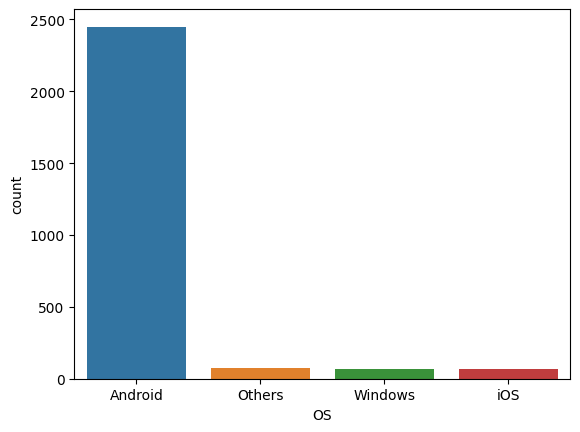

In [343]:
sns.countplot(data=data, x='OS')

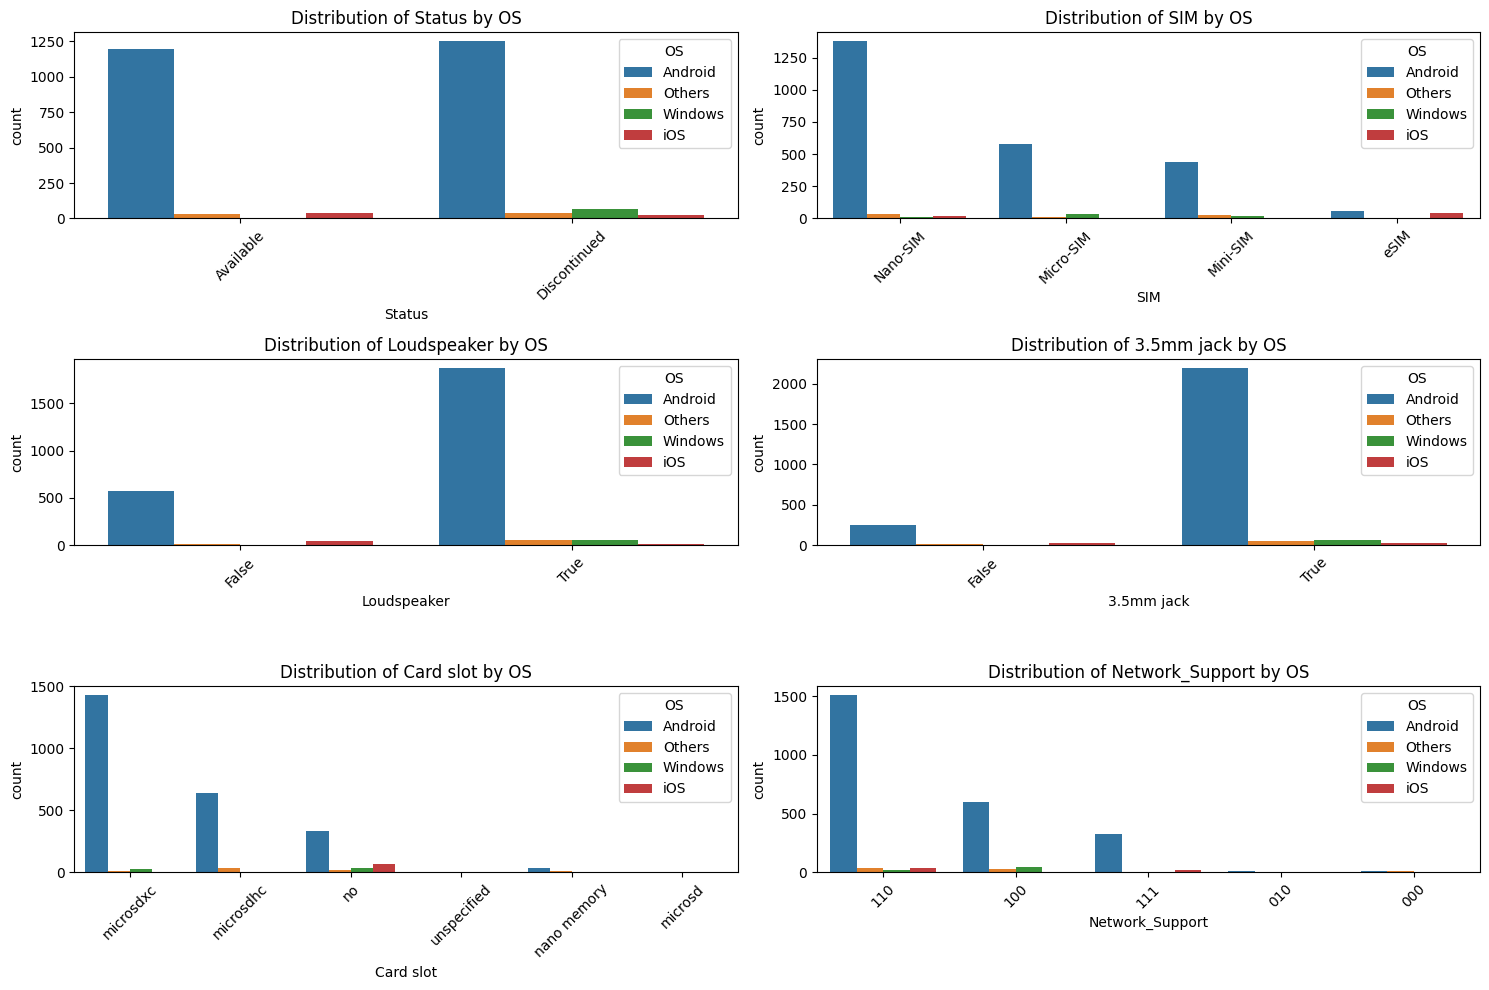

<Axes: xlabel='n_colors', ylabel='count'>

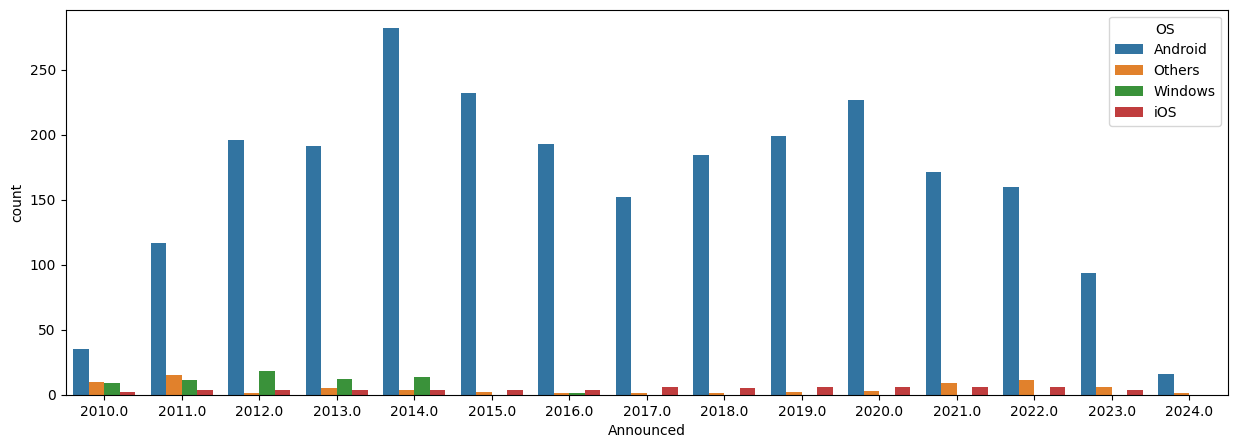

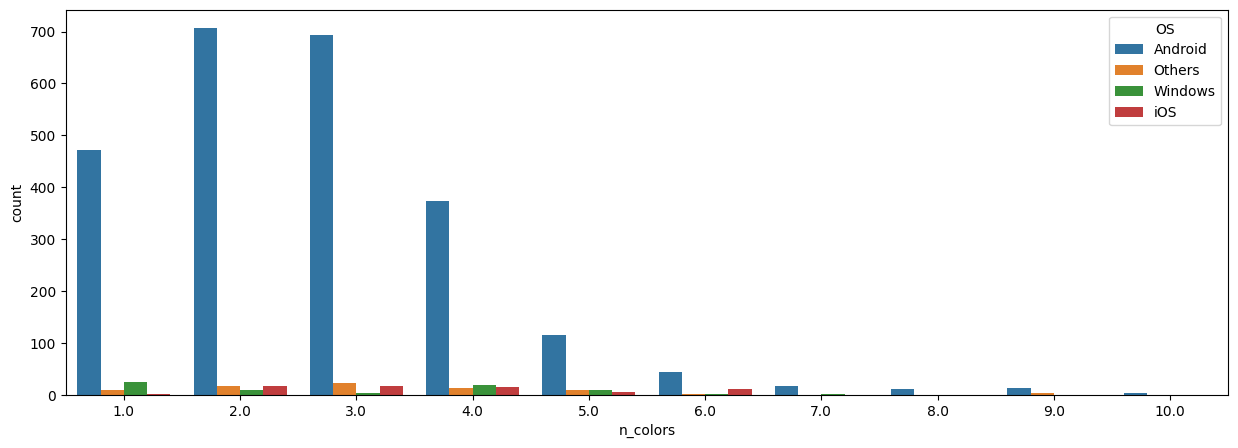

In [344]:
plt.figure(figsize=(15, 10))

for i, col in enumerate(categorical_cols, 1):
    plt.subplot(3, 2, i)  
    sns.countplot(data=data, x=col, hue='OS')
    plt.title(f'Distribution of {col} by OS')
    plt.xticks(rotation=45)  

plt.tight_layout()
plt.show()

plt.figure(figsize=(15, 5))
sns.countplot(data=data, x='Announced', hue='OS')

plt.figure(figsize=(15, 5))
sns.countplot(data=data, x='n_colors', hue='OS')


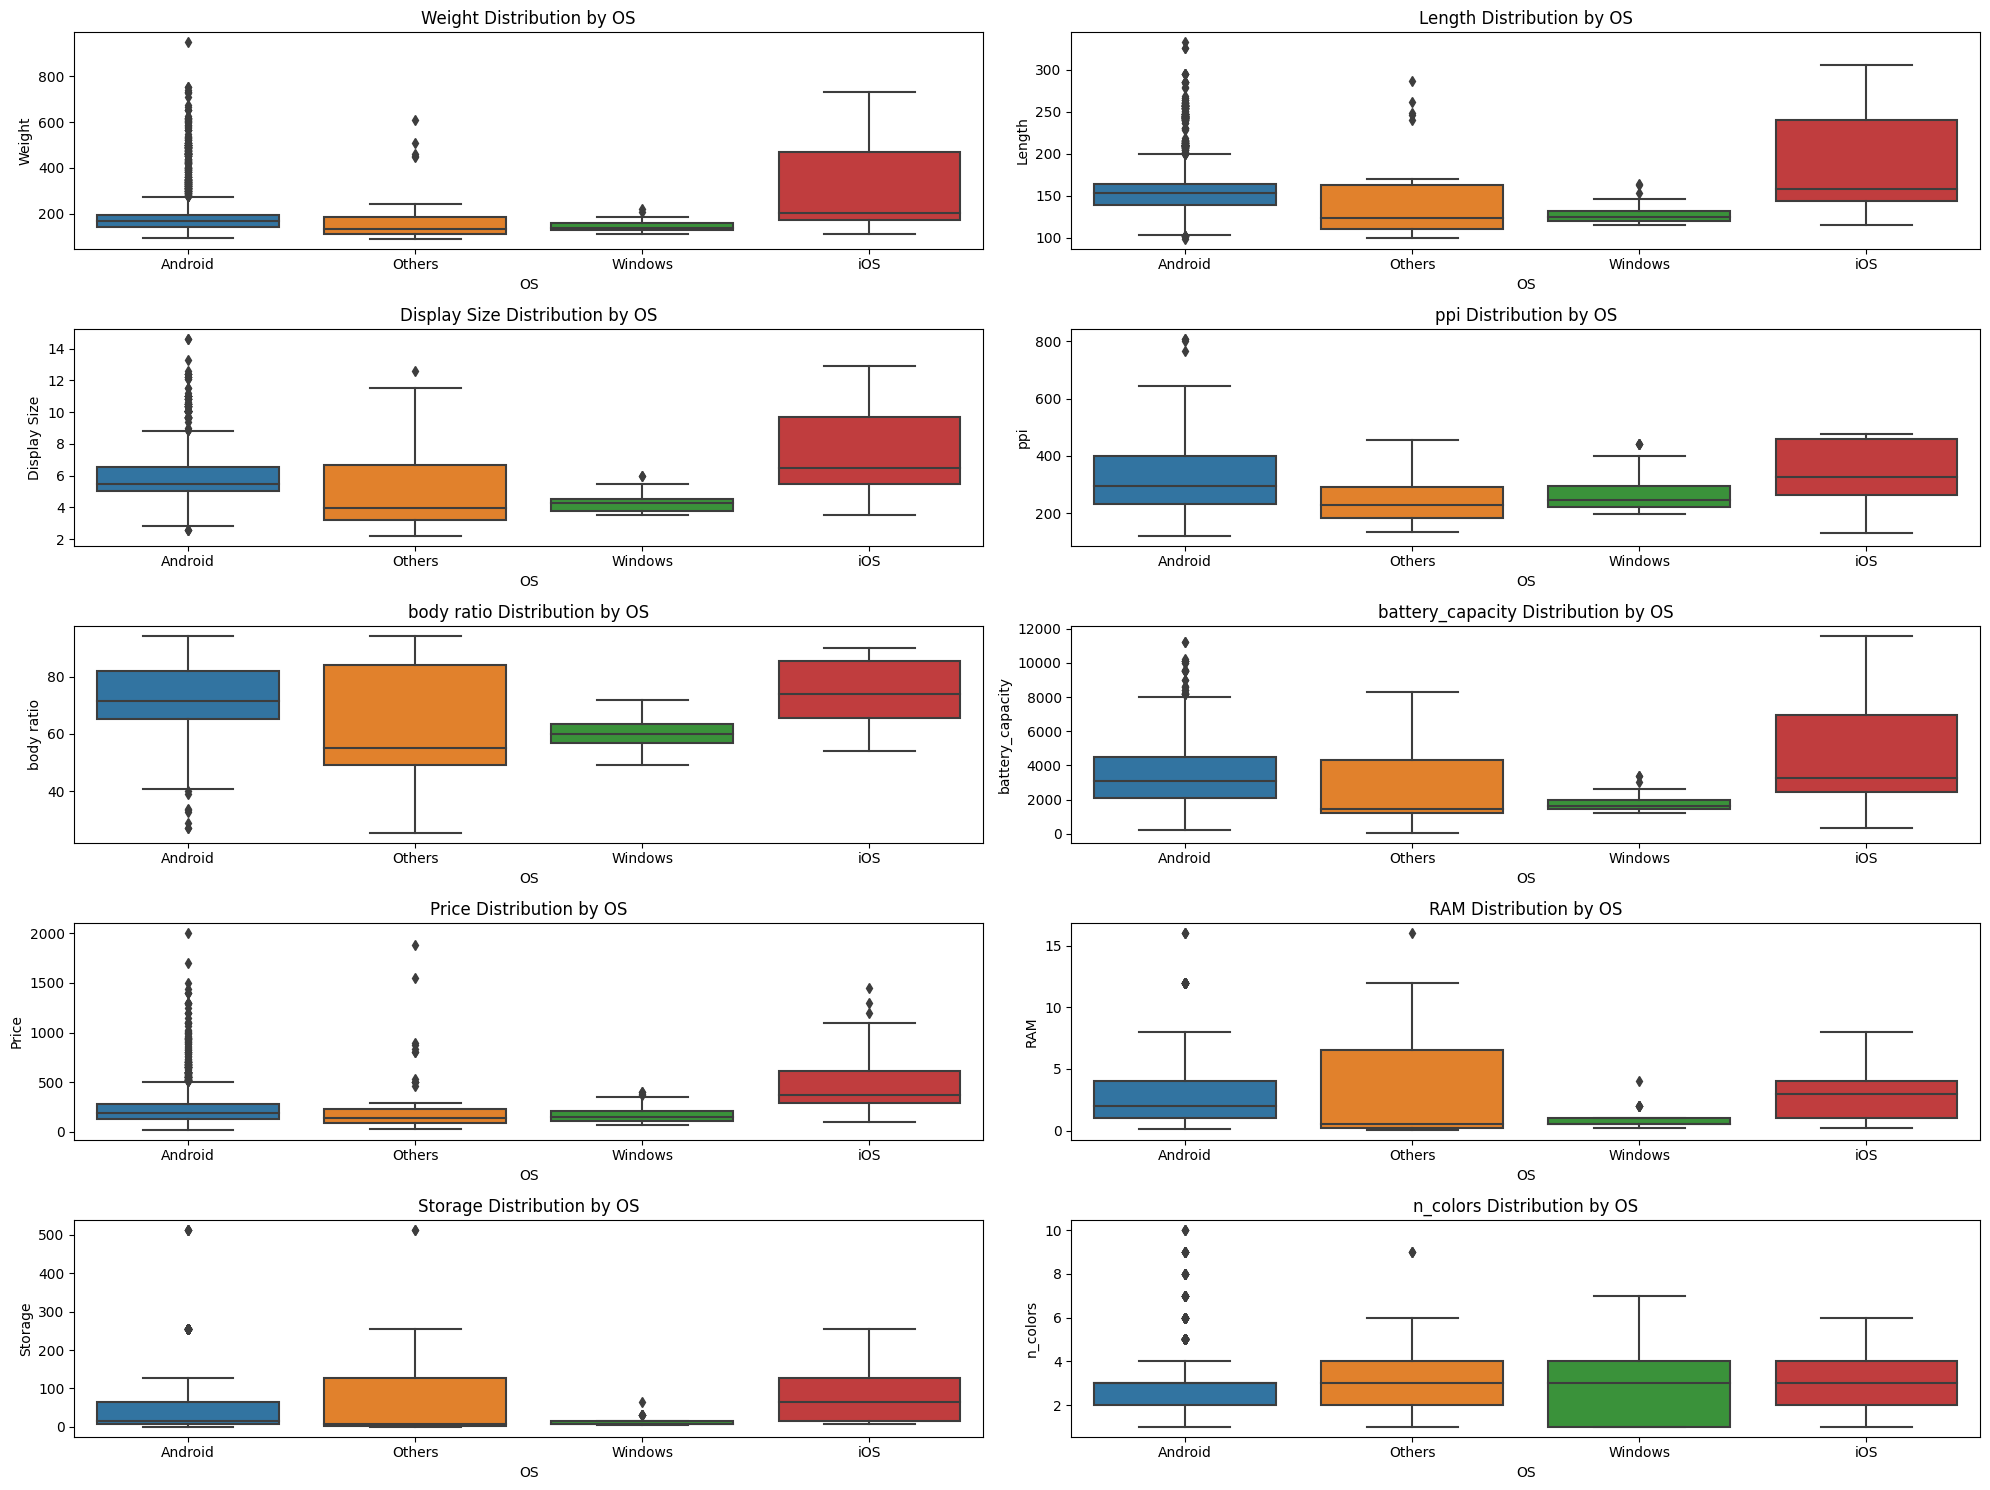

In [345]:
plt.figure(figsize=(20, 15))

for i, col in enumerate(continuous_cols[1:], 1):
    plt.subplot(5,2 , i)  
    sns.boxplot(data=data, x='OS', y=col)
    plt.title(f'{col} Distribution by OS')

plt.tight_layout()
plt.show()



Dummify

In [438]:
categorical_cols_to_dummify = ['Status', 'SIM', 'Card slot', 'Network_Support']

cleaned_data = data[feature_set1]
# cleaned_data.loc[cleaned_data.Status == 'Coming','Status'] = 'Available'
dummies = pd.get_dummies(cleaned_data[categorical_cols_to_dummify])
cleaned_data = pd.concat([cleaned_data, dummies], axis=1)
cleaned_data.drop(categorical_cols_to_dummify, inplace = True, axis=1)

In [347]:
cleaned_data.columns

Index(['Announced', 'Weight', 'Length', 'Display Size', 'ppi', 'body ratio',
       'battery_capacity', 'Price', 'Loudspeaker', '3.5mm jack', 'RAM',
       'Storage', 'n_colors', 'Status_Available', 'Status_Discontinued',
       'SIM_Micro-SIM', 'SIM_Mini-SIM', 'SIM_Nano-SIM', 'SIM_eSIM',
       'Card slot_microsd', 'Card slot_microsdhc', 'Card slot_microsdxc',
       'Card slot_nano memory', 'Card slot_no', 'Card slot_unspecified',
       'Network_Support_000', 'Network_Support_010', 'Network_Support_100',
       'Network_Support_110', 'Network_Support_111'],
      dtype='object')

In [439]:
cleaned_data['3.5mm jack'] = cleaned_data['3.5mm jack'].astype('int32')
cleaned_data['Loudspeaker'] = cleaned_data['Loudspeaker'].astype('int32')
# cleaned_data['Network_Support'] = cleaned_data['Network_Support'].astype('int64')

In [442]:
continuous_cols = []
categorical_cols = []

for col in cleaned_data.columns:
        if cleaned_data[col].dtype == 'float64':
            continuous_cols.append(col)
        else:
            categorical_cols.append(col)

In [443]:
continuous_cols

['Announced',
 'Weight',
 'Length',
 'Display Size',
 'ppi',
 'body ratio',
 'battery_capacity',
 'Price',
 'RAM',
 'Storage',
 'n_colors']

In [444]:
cleaned_data[continuous_cols].corr()

,Announced,Weight,Length,Display Size,ppi,body ratio,battery_capacity,Price,RAM,Storage,n_colors
Announced,1.000000,0.216229,0.403826,0.538291,0.408832,0.826368,0.631270,0.266497,0.721997,0.657078,0.175180
Weight,0.216229,1.000000,0.929611,0.888796,-0.127769,0.252390,0.761959,0.320519,0.220573,0.183730,-0.146334
Length,0.403826,0.929611,1.000000,0.971983,0.027790,0.462303,0.842882,0.335055,0.344843,0.271642,-0.081709
Display Size,0.538291,0.888796,0.971983,1.000000,0.129369,0.623587,0.895648,0.397758,0.478595,0.398903,-0.029705
ppi,0.408832,-0.127769,0.027790,0.129369,1.000000,0.583282,0.223173,0.456231,0.626512,0.508886,0.268301
body ratio,0.826368,0.252390,0.462303,0.623587,0.583282,1.000000,0.664450,0.425506,0.774524,0.674999,0.201173
battery_capacity,0.631270,0.761959,0.842882,0.895648,0.223173,0.664450,1.000000,0.392868,0.573253,0.495444,0.002548
Price,0.266497,0.320519,0.335055,0.397758,0.456231,0.425506,0.392868,1.000000,0.638511,0.637402,0.087734
RAM,0.721997,0.220573,0.344843,0.478595,0.626512,0.774524,0.573253,0.638511,1.000000,0.888562,0.174212
Storage,0.657078,0.183730,0.271642,0.398903,0.508886,0.674999,0.495444,0.637402,0.888562,1.000000,0.114713


In [445]:
categorical_cols

['Loudspeaker',
 '3.5mm jack',
 'Status_Available',
 'Status_Discontinued',
 'SIM_Micro-SIM',
 'SIM_Mini-SIM',
 'SIM_Nano-SIM',
 'SIM_eSIM',
 'Card slot_microsd',
 'Card slot_microsdhc',
 'Card slot_microsdxc',
 'Card slot_nano memory',
 'Card slot_no',
 'Card slot_unspecified',
 'Network_Support_000',
 'Network_Support_010',
 'Network_Support_100',
 'Network_Support_110',
 'Network_Support_111']

In [440]:
cleaned_data.head()

,Announced,Weight,Length,Display Size,ppi,body ratio,battery_capacity,Price,Loudspeaker,3.5mm jack,RAM,Storage,n_colors,Status_Available,Status_Discontinued,SIM_Micro-SIM,SIM_Mini-SIM,SIM_Nano-SIM,SIM_eSIM,Card slot_microsd,Card slot_microsdhc,Card slot_microsdxc,Card slot_nano memory,Card slot_no,Card slot_unspecified,Network_Support_000,Network_Support_010,Network_Support_100,Network_Support_110,Network_Support_111
0,2022.0,172.0,146.7,5.50,293.0,74.0,3000.0,100.0,1,1,2.0,32.0,2.0,True,False,False,False,True,False,False,False,True,False,False,False,False,False,False,True,False
1,2021.0,190.0,156.4,6.10,282.0,78.1,3000.0,110.0,1,1,2.0,32.0,2.0,True,False,False,False,True,False,False,False,True,False,False,False,False,False,False,True,False
2,2021.0,134.0,137.6,5.00,215.0,71.4,2000.0,60.0,1,1,1.0,8.0,2.0,True,False,False,False,True,False,False,True,False,False,False,False,False,False,False,True,False
3,2021.0,194.0,165.6,6.52,269.0,82.0,4000.0,330.0,1,1,4.0,64.0,2.0,True,False,False,False,True,False,False,False,True,False,False,False,False,False,False,True,False
4,2021.0,190.0,165.6,6.52,269.0,82.0,4000.0,130.0,1,1,3.0,32.0,2.0,True,False,False,False,True,False,False,False,True,False,False,False,False,False,False,True,False


Handling Outliers

In [44]:
outliers = IsolationForest(contamination=0.005, n_jobs=-1, random_state=45, bootstrap=True)

cls = outliers.fit_predict(cleaned_data)

In [45]:
data[cls== -1]['OS'].value_counts()

OS
Android    8
iOS        6
Name: count, dtype: int64

In [46]:
data[cls==-1]

,name,brand,2G,3G,4G,5G,Announced,Status,Weight,Length,Width,Diameter,SIM,Display Type,Display Size,ppi,body ratio,OS,battery_capacity,Price,CPU,ratio,pixel,WLAN,Colors,Sensors,Bluetooth,GPU,Loudspeaker,3.5mm jack,Chipset,Network,Internal,Card slot,RAM,Storage,Version,Network_Support
416,apple ipad pro 12 9 (2022),apple,True,True,True,True,2022.0,Available,682.0,280.6,214.9,6.4,eSIM,"Liquid Retina XDR mini-LED LCD, 120Hz, HDR10, ...",12.9,265.0,85.4,iOS,10758.0,1450.00,8.0,4:3,5595136.0,"Wi-Fi 802.11 a/b/g/n/ac/6e, dual-band, hotspot","Silver, Space Gray","Face ID, accelerometer, gyro, barometer","5.3, A2DP, LE, EDR",Apple GPU (10-core graphics),False,False,Apple M2,"GSM / HSPA / LTE / 5G HSPA, LTE-A, 5G","128GB 8GB RAM, 256GB 8GB RAM, 512GB 8GB RAM, 1...",no,8.0,128.0,16.1,111
438,apple ipad pro 12 9 (2021),apple,True,True,True,True,2021.0,Available,682.0,280.6,214.9,6.4,eSIM,"Liquid Retina XDR mini-LED LCD, 120Hz, HDR10, ...",12.9,265.0,85.4,iOS,10758.0,1200.00,8.0,4:3,5595136.0,"Wi-Fi 802.11 a/b/g/n/ac/6, dual-band, hotspot","Silver, Space Gray","Face ID, accelerometer, gyro, barometer","5.0, A2DP, LE, EDR",Apple GPU (8-core graphics),False,False,Apple M1,"GSM / CDMA / HSPA / EVDO / LTE / 5G HSPA, LTE-...","128GB 8GB RAM, 256GB 8GB RAM, 512GB 8GB RAM, 1...",no,8.0,128.0,14.5.1,111
451,apple ipad pro 12 9 (2020),apple,True,True,True,False,2020.0,Available,641.0,280.6,214.9,5.9,eSIM,"IPS LCD, 120Hz, 600 nits (typ)",12.9,265.0,85.4,iOS,9720.0,1000.00,8.0,4:3,5595136.0,"Wi-Fi 802.11 a/b/g/n/ac/6, dual-band, hotspot","Silver, Space Gray","Face ID, accelerometer, gyro, proximity, barom...","5.0, A2DP, LE, EDR",Apple GPU (8-core graphics),False,False,Apple A12Z Bionic,"GSM / CDMA / HSPA / EVDO / LTE HSPA, LTE-A, EV...","128GB 6GB RAM, 256GB 6GB RAM, 512GB 6GB RAM, 1...",no,6.0,128.0,13.4,110
462,apple ipad pro 12 9 (2018),apple,True,True,True,False,2018.0,Available,631.0,280.6,214.9,5.9,eSIM,"IPS LCD, 120Hz",12.9,265.0,85.4,iOS,9720.0,1100.00,8.0,4:3,5595136.0,"Wi-Fi 802.11 a/b/g/n/ac, dual-band, hotspot","Silver, Space Gray","Face ID, accelerometer, gyro, proximity, barom...","5.0, A2DP, LE, EDR",Apple GPU (7-core graphics),False,False,Apple A12X Bionic (7 nm),GSM / CDMA / HSPA / EVDO / LTE HSPA 42.2/5.76 ...,"64GB 4GB RAM, 256GB 4GB RAM, 512GB 4GB RAM, 1T...",no,4.0,64.0,12,110
476,apple ipad pro 12 9 (2017),apple,True,True,True,False,2017.0,Available,677.0,305.7,220.6,6.9,eSIM,"IPS LCD, 120Hz",12.9,265.0,76.4,iOS,891.0,900.00,6.0,4:3,5595136.0,"Wi-Fi 802.11 a/b/g/n/ac, dual-band, hotspot","Space Gray, Gold, Silver","Fingerprint (front-mounted), accelerometer, gy...","4.2, A2DP, EDR",PowerVR Series 7 (12-core graphics),False,True,Apple A10X Fusion (10 nm),GSM / CDMA / HSPA / EVDO / LTE HSPA 42.2/5.76 ...,"64GB 4GB RAM, 256GB 4GB RAM, 512GB 4GB RAM",no,4.0,64.0,10.3.2,110
493,apple ipad pro 12 9 (2015),apple,True,True,True,False,2015.0,Discontinued,713.0,305.7,220.6,6.9,eSIM,IPS LCD,12.9,264.0,77.0,iOS,307.0,850.00,2.0,4:3,5595136.0,"Wi-Fi 802.11 a/b/g/n/ac, dual-band, hotspot","Space Gray, Silver, Gold","Fingerprint (front-mounted), accelerometer, gy...","4.0, A2DP, EDR",PowerVR Series 7 (12-core graphics),False,True,Apple A9X (16 nm),GSM / CDMA / HSPA / EVDO / LTE HSPA 42.2/5.76 ...,"32GB 4GB RAM, 128GB 4GB RAM, 256GB 4GB RAM",no,4.0,32.0,9,110
3848,samsung galaxy s24 ultra,samsung,True,True,True,True,2024.0,Available,232.0,162.3,79,8.6,eSIM,"Dynamic LTPO AMOLED 2X, 120Hz, HDR10+, 2600 ni...",6.8,505.0,88.5,Android,5000.0,1299.00,NaN,5:9,4492800.0,"Wi-Fi 802.11 a/b/g/n/ac/6e/7, tri-band, Wi-Fi ...","Titanium Black, Titanium Gray, Titanium Violet...","Fingerprint (under display, ultrasonic), accel...","5.3, A2DP, LE",Adreno 750 (1 GHz),False,False,Qualcomm SM8650-AC Snapdragon 8 Gen 3 (4 nm),"GSM / CDMA / HSPA / EVDO / LTE / 5G HSPA, LTE-...","256GB 12GB RAM, 512GB 12GB RAM, 1TB 12GB RAM",no,12.0,256.0,14,111
3849,samsung galaxy s24+,samsung,True,True,True,True,2024.0,Available,196.0,158.5,75.9,7.7,eSIM,"Dynamic LTPO AMOLED 2X, 

Train-test split, scaling, oversampling

In [446]:
X = cleaned_data
y = data['OS']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns = X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns= X_test.columns)

categorical_indices = [X_train_scaled.columns.get_loc(col) for col in categorical_cols]

smote = SMOTENC(random_state=42, categorical_features = categorical_indices)
X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train )

y_train_smote.value_counts()



OS
Android    1958
Windows    1958
Others     1958
iOS        1958
Name: count, dtype: int64

In [447]:
X_train_scaled.head()

,Announced,Weight,Length,Display Size,ppi,body ratio,battery_capacity,Price,Loudspeaker,3.5mm jack,RAM,Storage,n_colors,Status_Available,Status_Discontinued,SIM_Micro-SIM,SIM_Mini-SIM,SIM_Nano-SIM,SIM_eSIM,Card slot_microsd,Card slot_microsdhc,Card slot_microsdxc,Card slot_nano memory,Card slot_no,Card slot_unspecified,Network_Support_000,Network_Support_010,Network_Support_100,Network_Support_110,Network_Support_111
0,-0.162704,-0.366877,0.064425,-0.162485,-0.443789,-0.239226,-0.420137,-0.009947,0.57154,0.356455,-0.358505,-0.512503,-0.537310,-0.965683,0.965683,-0.567909,-0.462070,0.918411,-0.19803,-0.043478,-0.585339,0.897659,-0.125746,-0.454535,-0.048622,-0.081533,-0.057557,-0.582434,0.806902,-0.388488
1,-0.708483,-0.427052,-0.433233,-0.467070,-0.906603,-0.337954,-0.844006,-0.797716,0.57154,0.356455,-0.763780,-0.719564,-1.240891,-0.965683,0.965683,1.760846,-0.462070,-1.088837,-0.19803,-0.043478,1.708411,-1.114008,-0.125746,-0.454535,-0.048622,-0.081533,-0.057557,1.716933,-1.239308,-0.388488
2,-0.435593,-0.611656,-0.370634,-0.467070,-0.177917,-0.311028,-0.722901,-0.377573,0.57154,0.356455,-0.358505,-0.512503,0.166271,-0.965683,0.965683,-0.567909,-0.462070,0.918411,-0.19803,-0.043478,-0.585339,0.897659,-0.125746,-0.454535,-0.048622,-0.081533,-0.057557,-0.582434,0.806902,-0.388488
3,0.928854,-0.315881,0.011216,0.270026,1.013583,1.017318,0.003731,-0.220019,0.57154,0.356455,0.452045,1.420067,0.166271,1.035537,-1.035537,-0.567909,-0.462070,0.918411,-0.19803,-0.043478,-0.585339,0.897659,-0.125746,-0.454535,-0.048622,-0.081533,-0.057557,-0.582434,0.806902,-0.388488
4,-1.800040,-0.774842,-1.597564,-1.563577,-1.300487,-1.872733,-1.328427,-0.640163,0.57154,0.356455,-1.017077,-0.779957,0.166271,-0.965683,0.965683,-0.567909,2.164173,-1.088837,-0.19803,-0.043478,1.708411,-1.114008,-0.125746,-0.454535,-0.048622,-0.081533,-0.057557,1.716933,-1.239308,-0.388488


### Models

In [265]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import label_binarize
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay



Logistic Rgression

In [109]:
log_reg_params = {
    'C': np.logspace(-4, 4, 20),
    'solver': ['liblinear', 'lbfgs','saga'],
    'max_iter': [100, 1000, 2500, 5000]
}

log_reg = LogisticRegression(multi_class='multinomial')

log_reg_random = RandomizedSearchCV(log_reg, log_reg_params, n_iter=10, cv=5, random_state=42, scoring='precision_weighted')
log_reg_random.fit(X_train_smote, y_train_smote)


c:\Users\Snapp\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Snapp\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

RandomizedSearchCV(cv=5,
                   estimator=LogisticRegression(multi_class='multinomial'),
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'max_iter': [100, 1000, 2500, 5000],
                                        'solver': ['liblinear', 'lbfgs',
                                                   'saga']},
                   random_state=42, scoring='precision_weighted')

In [110]:
log_reg_random.best_score_

0.9211906828619968

In [111]:
log_reg_random.best_params_

{'solver': 'lbfgs', 'max_iter': 1000, 'C': 78.47599703514607}

In [112]:
pd.DataFrame(log_reg_random.cv_results_)


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_solver,param_max_iter,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.012283,0.003505,0.000000,0.000000,liblinear,100,0.000695,"{'solver': 'liblinear', 'max_iter': 100, 'C': ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,7
1,0.008714,0.004954,0.000000,0.000000,liblinear,2500,0.0001,"{'solver': 'liblinear', 'max_iter': 2500, 'C':...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,7
2,0.012797,0.006399,0.000000,0.000000,liblinear,5000,0.088587,"{'solver': 'liblinear', 'max_iter': 5000, 'C':...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,7
3,0.132909,0.013140,0.011161,0.005134,lbfgs,100,0.615848,"{'solver': 'lbfgs', 'max_iter': 100, 'C': 0.61...",0.904702,0.914538,0.930502,0.922275,0.928155,0.920034,0.009443,3
4,1.267507,0.151340,0.015311,0.000918,saga,2500,0.233572,"{'solver': 'saga', 'max_iter': 2500, 'C': 0.23...",0.900679,0.912680,0.927916,0.922332,0.926202,0.917962,0.010126,5
5,0.384783,0.113341,0.010560,0.008744,lbfgs,1000,78.475997,"{'solver': 'lbfgs', 'max_iter': 1000, 'C': 78....",0.908128,0.915392,0.929298,0.921175,0.931961,0.921191,0.008786,1
6,3.830158,0.263352,0.010373,0.005808,saga,1000,10000.0,"{'solver': 'saga', 'max_iter': 1000, 'C': 1000...",0.906019,0.916681,0.929156,0.921762,0.931229,0.920970,0.009109,2
7,0.346065,0.036917,0.012518,0.006259,saga,100,0.088587,"{'solver': 'saga', 'max_iter': 100, 'C': 0.088...",0.893955,0.904654,0.921864,0.912415,0.913691,0.909316,0.009422,6
8,0.012630,0.004487,0.000000,0.000000,liblinear,5000,0.0001,"{'solver': 'liblinear', 'max_iter': 5000, 'C':...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,7
9,6.458052,1.436192,0.011826,0.006974,saga,5000,4.281332,"{'solver': 'saga', 'max_iter': 5000, 'C': 4.28...",0.902856,0.915453,0.929200,0.921767,0.930627,0.919981,0.010152,4


In [113]:
log_pred = log_reg_random.best_estimator_.predict(X_test_scaled)

In [114]:
from sklearn.metrics import classification_report

report = classification_report(y_test, log_pred)

print(report)

              precision    recall  f1-score   support

     Android       0.99      0.81      0.89       491
      Others       0.12      0.64      0.21        14
     Windows       0.26      0.85      0.40        13
         iOS       0.86      0.92      0.89        13

    accuracy                           0.81       531
   macro avg       0.56      0.81      0.60       531
weighted avg       0.94      0.81      0.86       531



In [115]:
log_reg_random.best_estimator_.coef_

array([[-1.01961621e-01, -3.90179462e+00,  3.16006441e+00,
        -1.40162981e-01,  1.45116887e+00,  1.35589248e+00,
        -8.67753263e-02,  2.20145160e-01, -1.06647785e-01,
        -2.46061182e-01,  4.84113282e+00, -2.34608961e+00,
        -1.28307803e-01,  8.51126556e-02,  2.80419312e+00,
        -2.80419312e+00,  3.17863672e+00,  3.72630665e+00,
         1.04393437e+00, -2.12716698e-01,  7.91416683e-01,
         8.47576445e+00,  8.98643345e+00,  2.83199679e+00,
         4.46008699e+00,  1.06501471e+00],
       [ 1.17694366e+00, -2.30532505e+00,  6.40012810e-01,
        -2.27784776e+00,  1.45938553e-01,  1.46811585e+00,
        -2.85552998e-01,  1.73066398e+00,  1.57534995e+00,
        -8.18626590e-01,  5.75309853e+00, -1.81165278e+00,
        -1.33829839e-01,  5.40494724e-01,  2.86638632e+00,
        -2.86638632e+00,  1.47634402e+00,  2.66708996e+00,
        -6.53067667e-01, -5.68290328e+00, -3.73226123e-02,
         3.05908017e-01, -1.06909241e+00,  6.32825145e-01,
        -2.43

In [116]:
log_reg_random.best_estimator_.classes_

array(['Android', 'Others', 'Windows', 'iOS'], dtype=object)

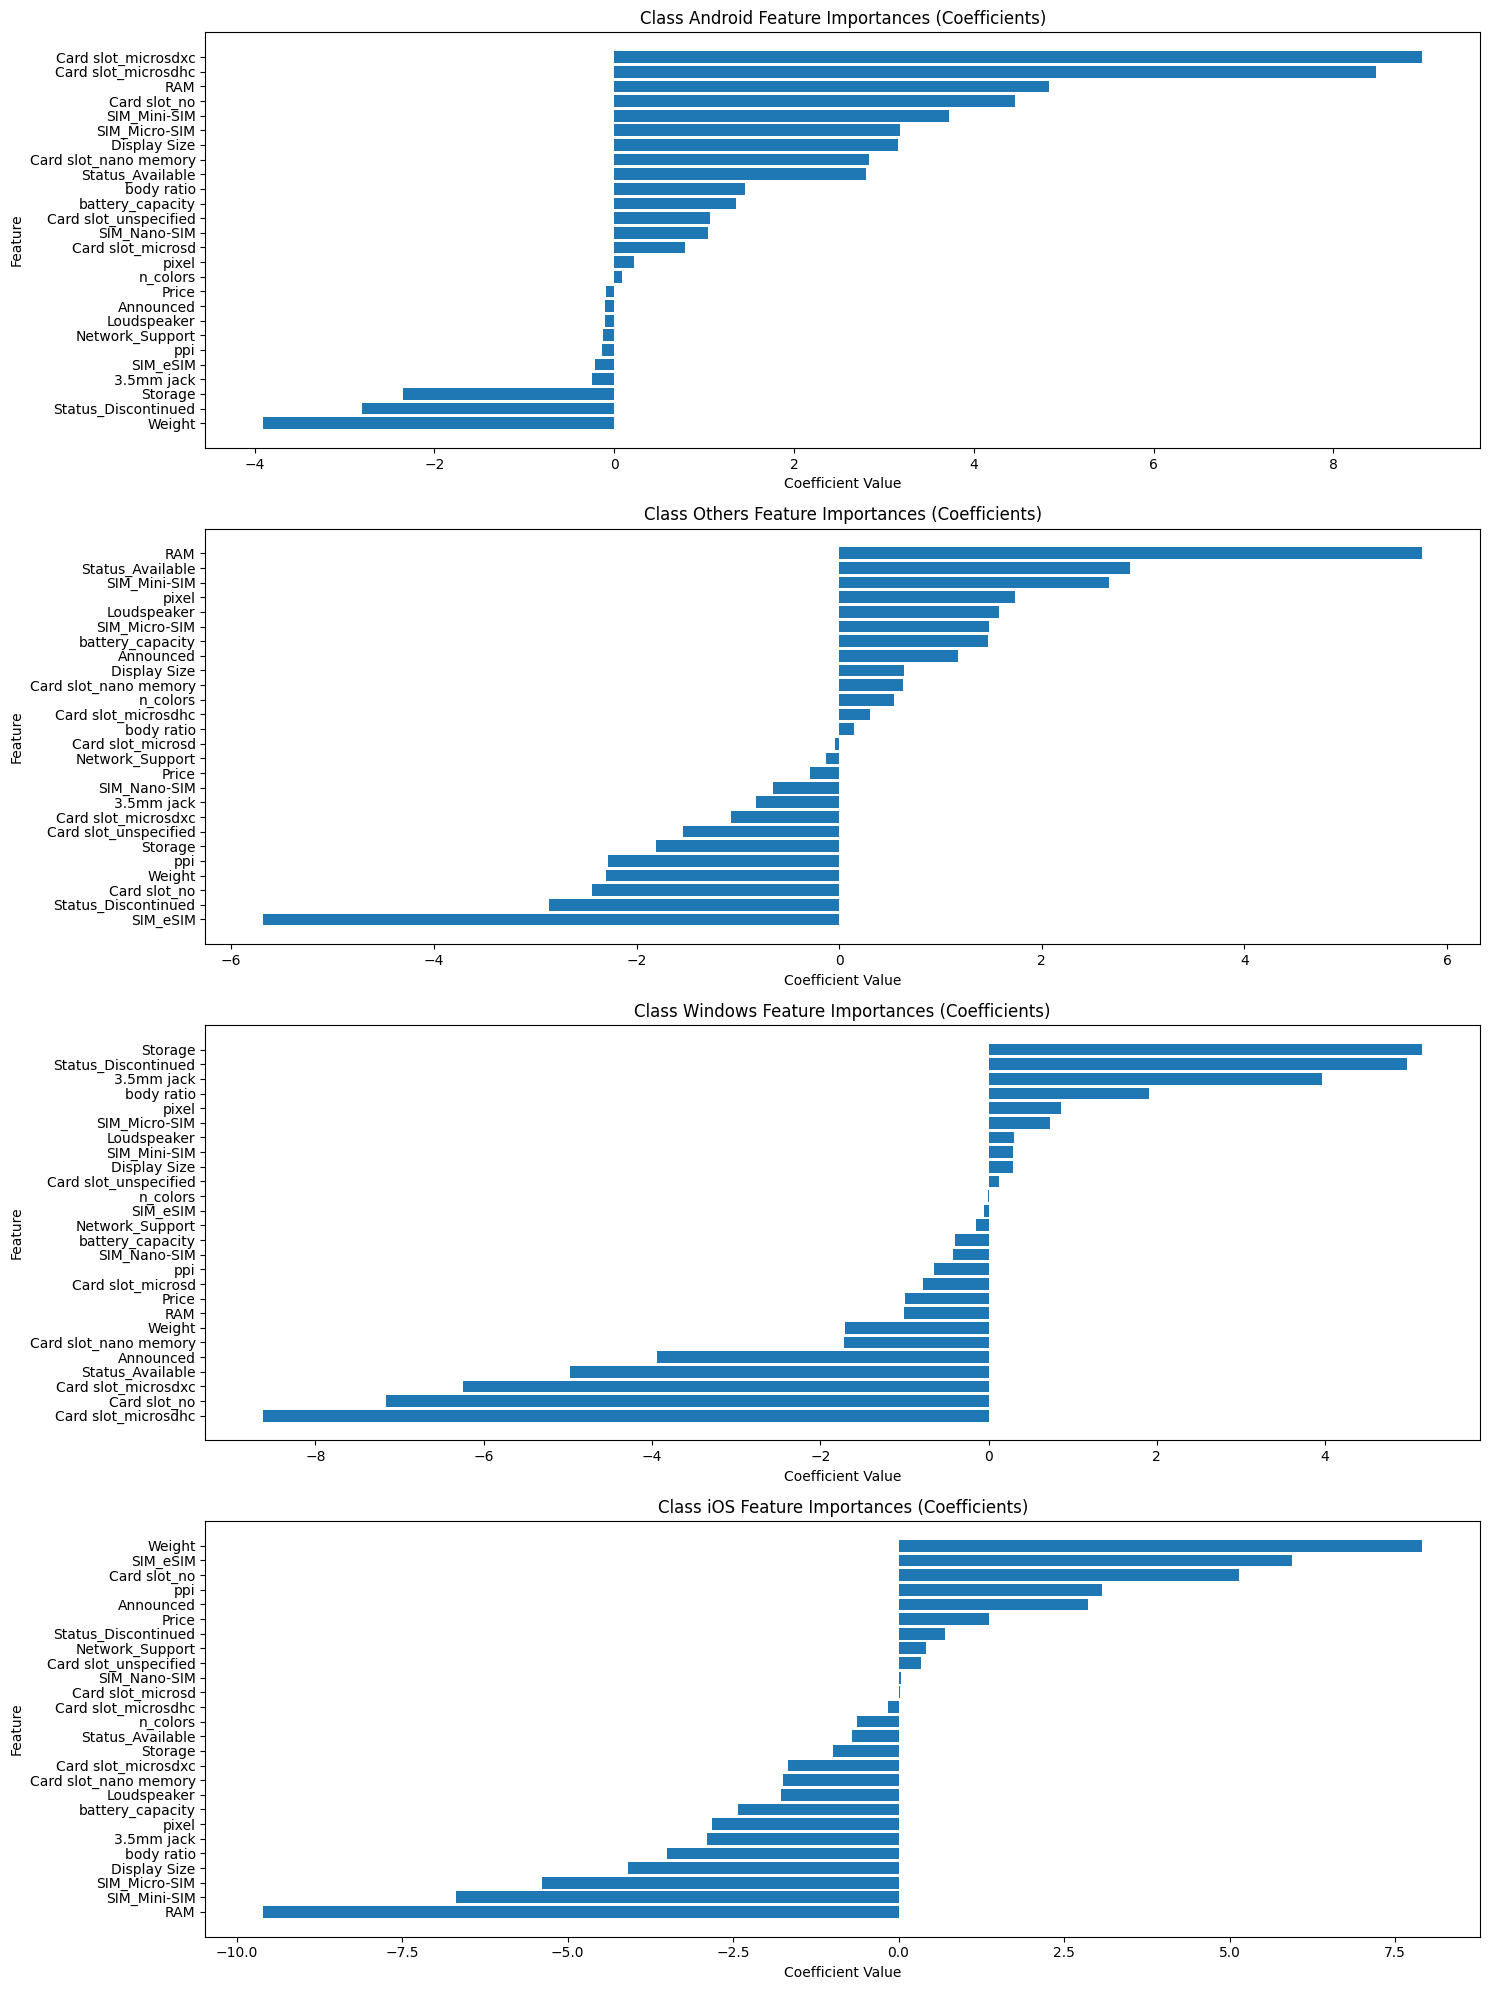

In [117]:
coefficients = log_reg_random.best_estimator_.coef_

n_classes = coefficients.shape[0]
n_features = coefficients.shape[1]
feature_names = X_train.columns
class_names = log_reg_random.best_estimator_.classes_

plt.figure(figsize=(15, n_classes * 5))

for class_idx in range(n_classes):
    plt.subplot(n_classes, 1, class_idx + 1)
    sorted_idx = np.argsort(coefficients[class_idx])
    
    plt.barh(range(n_features), coefficients[class_idx][sorted_idx], align='center')
    plt.yticks(range(n_features), feature_names[sorted_idx])
    plt.title(f'Class {class_names[class_idx]} Feature Importances (Coefficients)')
    plt.xlabel('Coefficient Value')
    plt.ylabel('Feature')

plt.tight_layout()
plt.show()


In [118]:
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import label_binarize

y_test_binarized = label_binarize(y_test, classes=np.unique(y_test))
y_pred_proba = log_reg_random.best_estimator_.predict_proba(X_test_scaled)

auc_score = roc_auc_score(y_test_binarized, y_pred_proba, multi_class='ovr')

print(f'Multi-class AUC: {auc_score}')


Multi-class AUC: 0.9094354696599356


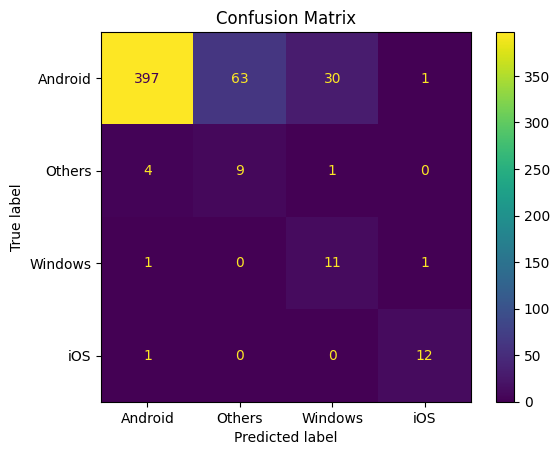

In [119]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, log_pred)

disp = ConfusionMatrixDisplay(cm, display_labels=np.unique(y_test))

disp.plot()
plt.title('Confusion Matrix')
plt.show()


SVM (linear, non-linear)

In [57]:
import sklearn
from sklearn.svm import SVC

svm_params = {
    'C': np.logspace(-4, 4, 20),
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto'],
    'degree': [2, 3, 4]  #for 'poly' kernel
}

svm = SVC(decision_function_shape='ovo', probability=True) 

svm_random = RandomizedSearchCV(svm, svm_params, n_iter=10, cv=5, random_state=42, scoring='precision_weighted')
svm_random.fit(X_train_smote, y_train_smote)


RandomizedSearchCV(cv=5,
                   estimator=SVC(decision_function_shape='ovo',
                                 probability=True),
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'degree': [2, 3, 4],
                                        'gamma': ['scale', 'auto'],
                                        'kernel': ['linear', 'rbf', 'poly']},
                   random_state=42, scoring='precision_weighted')

In [58]:
svm_random.best_score_

0.978601421115356

In [59]:
svm_random.best_estimator_

SVC(C=545.5594781168514, decision_function_shape='ovo', degree=4, kernel='poly',
    probability=True)

In [60]:
pd.DataFrame(svm_random.cv_results_)


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_kernel,param_gamma,param_degree,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.873578,0.051272,0.052728,0.003151,poly,scale,3,11.288379,"{'kernel': 'poly', 'gamma': 'scale', 'degree':...",0.929705,0.944774,0.970079,0.961099,0.957697,0.952671,0.014065,4
1,2.660962,0.061636,0.139670,0.008820,linear,scale,3,0.000695,"{'kernel': 'linear', 'gamma': 'scale', 'degree...",0.837409,0.843695,0.843586,0.844220,0.864547,0.846691,0.009271,8
2,28.598570,2.224472,0.037856,0.006078,linear,auto,4,206.913808,"{'kernel': 'linear', 'gamma': 'auto', 'degree'...",0.923517,0.939134,0.947972,0.937052,0.947268,0.938988,0.008859,5
3,0.853033,0.060778,0.027027,0.007770,poly,scale,4,545.559478,"{'kernel': 'poly', 'gamma': 'scale', 'degree':...",0.958018,0.978251,0.986180,0.987453,0.983105,0.978601,0.010769,1
4,5.739588,0.231726,0.180349,0.004815,poly,scale,2,0.001833,"{'kernel': 'poly', 'gamma': 'scale', 'degree':...",0.619243,0.633148,0.612777,0.597609,0.601620,0.612879,0.012738,10
5,0.894910,0.100510,0.028221,0.008407,poly,scale,2,206.913808,"{'kernel': 'poly', 'gamma': 'scale', 'degree':...",0.952865,0.977937,0.981920,0.987326,0.975036,0.975017,0.011819,2
6,4.917951,0.118156,0.181684,0.005739,linear,auto,4,0.0001,"{'kernel': 'linear', 'gamma': 'auto', 'degree'...",0.736417,0.741472,0.735566,0.741009,0.746835,0.740260,0.004051,9
7,1.883209,0.067157,0.108008,0.005509,linear,auto,2,0.001833,"{'kernel': 'linear', 'gamma': 'auto', 'degree'...",0.844530,0.851144,0.848442,0.854774,0.867082,0.853194,0.007710,7
8,0.926628,0.092259,0.052929,0.013143,poly,scale,4,29.763514,"{'kernel': 'poly', 'gamma': 'scale', 'degree':...",0.941692,0.953559,0.974570,0.968819,0.960287,0.959785,0.011546,3
9,3.849349,0.154621,0.476550,0.044976,rbf,auto,4,0.033598,"{'kernel': 'rbf', 'gamma': 'auto', 'degree': 4...",0.857163,0.865532,0.869534,0.866755,0.881931,0.868183,0.008017,6


In [61]:
svm_pred = svm_random.best_estimator_.predict(X_test_scaled)
report = classification_report(y_test, svm_pred)

print(report)

              precision    recall  f1-score   support

     Android       0.98      0.95      0.96       491
      Others       0.30      0.57      0.39        14
     Windows       0.55      0.85      0.67        13
         iOS       1.00      0.85      0.92        13

    accuracy                           0.93       531
   macro avg       0.71      0.80      0.73       531
weighted avg       0.95      0.93      0.94       531



In [62]:
y_test_binarized = label_binarize(y_test, classes=np.unique(y_test))
y_pred_proba = svm_random.best_estimator_.predict_proba(X_test_scaled)

auc_score = roc_auc_score(y_test_binarized, y_pred_proba, multi_class='ovo')

print(f'Multi-class AUC: {auc_score}')

Multi-class AUC: 0.8969506078231757


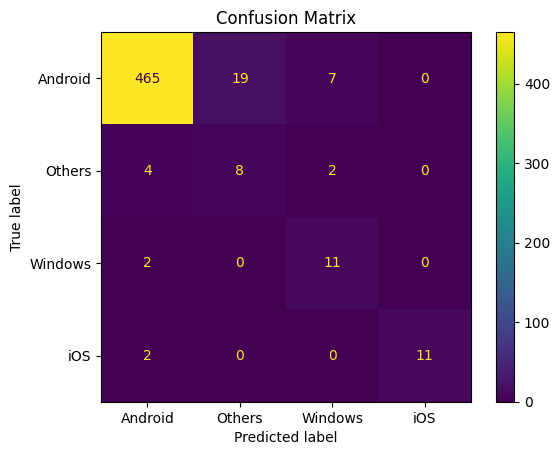

In [63]:
cm = confusion_matrix(y_test, svm_pred)

disp = ConfusionMatrixDisplay(cm, display_labels=np.unique(y_test))

disp.plot()
plt.title('Confusion Matrix')
plt.show()


AdaBoost

In [278]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

ada = AdaBoostClassifier(estimator=DecisionTreeClassifier() )
ada_params = {
    'estimator__max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9],
    'n_estimators': [50, 100, 200, 300, 400],
    'learning_rate': [0.01, 0.1, 1, 1.5, 2, 10]
}

ada_random = RandomizedSearchCV(ada, ada_params, n_iter=15, cv=5, random_state=42, scoring='precision_weighted')
ada_random.fit(X_train_scaled, y_train)


c:\Users\Snapp\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Snapp\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Snapp\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Snapp\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samp

RandomizedSearchCV(cv=5,
                   estimator=AdaBoostClassifier(estimator=DecisionTreeClassifier()),
                   n_iter=15,
                   param_distributions={'estimator__max_depth': [1, 2, 3, 4, 5,
                                                                 6, 7, 8, 9],
                                        'learning_rate': [0.01, 0.1, 1, 1.5, 2,
                                                          10],
                                        'n_estimators': [50, 100, 200, 300,
                                                         400]},
                   random_state=42, scoring='precision_weighted')

In [273]:
ada_random.best_score_ #oversampled

0.9936629174005424

In [279]:
ada_random.best_score_

0.9615473553298226

In [274]:
ada_random.best_estimator_.get_params #oversampled

<bound method BaseEstimator.get_params of AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=8),
                   learning_rate=1, n_estimators=300)>

In [280]:
ada_random.best_estimator_.get_params

<bound method BaseEstimator.get_params of AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=8),
                   learning_rate=1.5, n_estimators=200)>

In [275]:
pd.DataFrame(ada_random.cv_results_) #oversampled

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_learning_rate,param_estimator__max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,9.466078,0.892324,0.131255,0.007375,400,10,1,"{'n_estimators': 400, 'learning_rate': 10, 'es...",0.447781,0.484189,0.495235,0.488915,0.487715,0.480767,0.016875,10
1,8.421910,0.265319,0.078328,0.005070,200,0.01,3,"{'n_estimators': 200, 'learning_rate': 0.01, '...",0.909537,0.871801,0.906399,0.856022,0.852973,0.879346,0.024248,7
2,23.598445,0.333866,0.139331,0.011581,300,1,8,"{'n_estimators': 300, 'learning_rate': 1, 'est...",0.980988,0.996200,0.997462,0.996202,0.997462,0.993663,0.006362,1
3,14.727623,0.495725,0.117421,0.013217,300,10,4,"{'n_estimators': 300, 'learning_rate': 10, 'es...",0.868868,0.950300,0.969526,0.891405,0.955542,0.927128,0.039528,6
4,3.595876,0.034760,0.033735,0.004282,50,0.1,8,"{'n_estimators': 50, 'learning_rate': 0.1, 'es...",0.976371,0.989806,0.994924,0.991125,0.992983,0.989042,0.006567,3
5,0.956936,0.030359,0.033274,0.002278,50,10,1,"{'n_estimators': 50, 'learning_rate': 10, 'est...",0.449718,0.484189,0.495356,0.489035,0.487715,0.481202,0.016151,9
6,10.869920,0.226173,0.126727,0.019990,400,0.01,2,"{'n_estimators': 400, 'learning_rate': 0.01, '...",0.839084,0.834040,0.846567,0.831492,0.801410,0.830518,0.015437,8
7,12.742071,0.350630,0.106969,0.008030,300,0.1,4,"{'n_estimators': 300, 'learning_rate': 0.1, 'e...",0.964033,0.968253,0.913126,0.974793,0.968348,0.957710,0.022556,5
8,17.127427,0.397430,0.113223,0.012391,300,1,6,"{'n_estimators': 300, 'learning_rate': 1, 'est...",0.978609,0.994940,0.996835,0.997457,0.996198,0.992808,0.007148,2
9,17.070633,0.826621,0.109908,0.018271,300,10,6,"{'n_estimators': 300, 'learning_rate': 10, 'es...",0.959451,0.957722,0.966064,0.974720,0.979733,0.967538,0.008535,4


In [281]:
pd.DataFrame(ada_random.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_learning_rate,param_estimator__max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.264213,0.015513,0.014375,0.003168,50,0.01,2,"{'n_estimators': 50, 'learning_rate': 0.01, 'e...",0.898428,0.871405,0.886478,0.878351,0.910998,0.889132,0.014156,15
1,0.794993,0.036048,0.019031,0.006123,100,10,4,"{'n_estimators': 100, 'learning_rate': 10, 'es...",0.947319,0.920448,0.954645,0.933942,0.962543,0.943779,0.014992,12
2,2.560729,0.104009,0.059193,0.007975,400,1.5,3,"{'n_estimators': 400, 'learning_rate': 1.5, 'e...",0.947056,0.924995,0.952020,0.935297,0.943673,0.940608,0.009520,13
3,1.841750,0.097664,0.038418,0.006413,200,0.1,5,"{'n_estimators': 200, 'learning_rate': 0.1, 'e...",0.958310,0.935999,0.958369,0.939795,0.945630,0.947621,0.009274,10
4,1.153069,0.063737,0.019840,0.003531,100,1.5,7,"{'n_estimators': 100, 'learning_rate': 1.5, 'e...",0.972539,0.950074,0.968120,0.956293,0.956201,0.960645,0.008340,2
5,1.780826,0.112671,0.037761,0.006635,200,1.5,5,"{'n_estimators': 200, 'learning_rate': 1.5, 'e...",0.970324,0.954387,0.961572,0.951972,0.954019,0.958455,0.006765,4
6,4.235108,0.275194,0.056397,0.006926,400,10,7,"{'n_estimators': 400, 'learning_rate': 10, 'es...",0.972233,0.950273,0.956848,0.935736,0.962543,0.955527,0.012242,5
7,0.236157,0.021159,0.008815,0.007089,50,1.5,2,"{'n_estimators': 50, 'learning_rate': 1.5, 'es...",0.905207,0.890648,0.940234,0.895319,0.923307,0.910943,0.018438,14
8,2.889215,0.142127,0.050411,0.004411,300,0.1,6,"{'n_estimators': 300, 'learning_rate': 0.1, 'e...",0.965174,0.943192,0.956432,0.953451,0.950458,0.953741,0.007212,6
9,2.757372,0.132795,0.045461,0.007498,200,0.1,9,"{'n_estimators': 200, 'learning_rate': 0.1, 'e...",0.961071,0.950112,0.961048,0.941179,0.936803,0.950043,0.009966,8


In [276]:
ada_pred = ada_random.best_estimator_.predict(X_test_scaled)
report = classification_report(y_test, ada_pred) #oversampled

print(report)

              precision    recall  f1-score   support

     Android       0.97      1.00      0.98       491
      Others       0.89      0.57      0.70        14
     Windows       0.78      0.54      0.64        13
         iOS       1.00      0.62      0.76        13

    accuracy                           0.96       531
   macro avg       0.91      0.68      0.77       531
weighted avg       0.96      0.96      0.96       531



In [282]:
ada_pred = ada_random.best_estimator_.predict(X_test_scaled)
report = classification_report(y_test, ada_pred)

print(report)

              precision    recall  f1-score   support

     Android       0.97      1.00      0.98       491
      Others       1.00      0.50      0.67        14
     Windows       0.78      0.54      0.64        13
         iOS       1.00      0.77      0.87        13

    accuracy                           0.97       531
   macro avg       0.94      0.70      0.79       531
weighted avg       0.97      0.97      0.96       531



<Axes: >

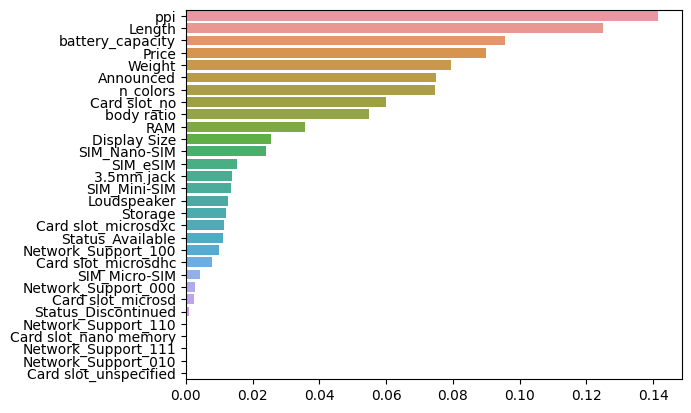

In [448]:
indices = np.argsort(ada_random.best_estimator_.feature_importances_)[::-1]
sns.barplot(y=X_train_scaled.columns[indices], x=ada_random.best_estimator_.feature_importances_[indices])

In [283]:
y_test_binarized = label_binarize(y_test, classes=np.unique(y_test))
y_pred_proba = ada_random.best_estimator_.predict_proba(X_test_scaled)

auc_score = roc_auc_score(y_test_binarized, y_pred_proba, multi_class='ovo')

print(f'Multi-class AUC: {auc_score}')

Multi-class AUC: 0.9621565454293929


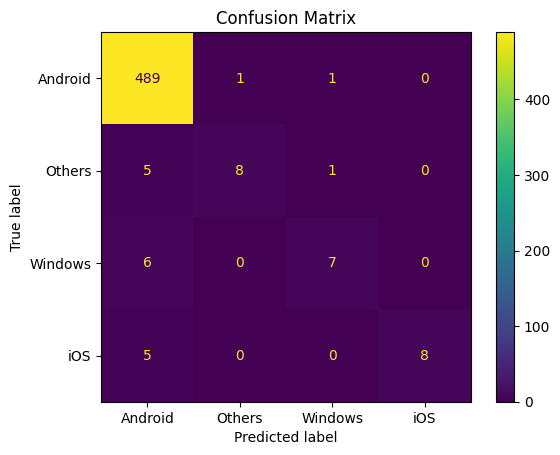

In [277]:
cm = confusion_matrix(y_test, ada_pred) #oversampled

disp = ConfusionMatrixDisplay(cm, display_labels=np.unique(y_test) )

disp.plot()
plt.title('Confusion Matrix')
plt.show()


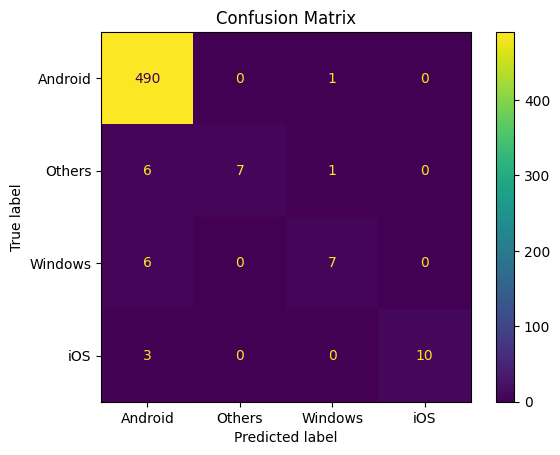

In [284]:
cm = confusion_matrix(y_test, ada_pred)

disp = ConfusionMatrixDisplay(cm, display_labels=np.unique(y_test) )

disp.plot()
plt.title('Confusion Matrix')
plt.show()


### PART 2

In [452]:
data.groupby('OS')['battery_capacity'].describe()

,count,mean,std,min,25%,50%,75%,max
OS,,,,,,,,
Android,2449.0,3418.541854,1544.056445,200.0,2100.0,3075.0,4500.0,11200.0
Others,72.0,2639.305556,2007.543749,50.0,1200.0,1475.0,4325.0,8300.0
Windows,65.0,1771.230769,490.511556,1230.0,1430.0,1650.0,2000.0,3400.0
iOS,65.0,4578.876923,3001.951014,307.0,2438.0,3274.0,6930.0,11560.0


In [453]:
data['battery_capacity'].describe()

count     2651.000000
mean      3385.437948
std       1627.512406
min         50.000000
25%       2070.000000
50%       3000.000000
75%       4500.000000
max      11560.000000
Name: battery_capacity, dtype: float64

In [454]:
data['battery_cat'] = ['1' if x <= 2070 else '2' if x > 2070 and x <= 4500 else '3' for x in data.battery_capacity]

<Axes: xlabel='battery_cat', ylabel='count'>

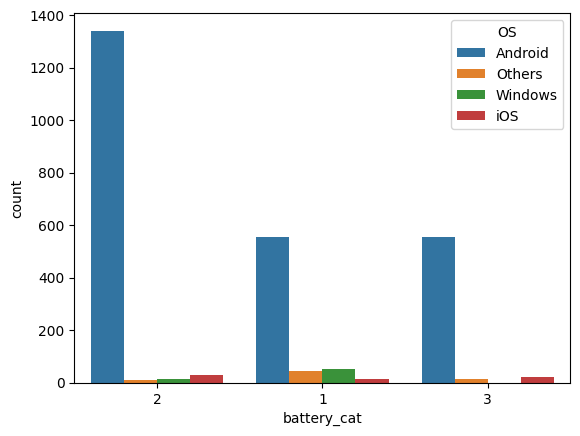

In [455]:
sns.countplot(data=data, x='battery_cat', hue='OS')


In [456]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2651 entries, 0 to 4678
Data columns (total 40 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              2651 non-null   object 
 1   brand             2651 non-null   object 
 2   2G                2651 non-null   bool   
 3   3G                2651 non-null   bool   
 4   4G                2651 non-null   bool   
 5   5G                2651 non-null   bool   
 6   Announced         2651 non-null   float64
 7   Status            2651 non-null   object 
 8   Weight            2651 non-null   float64
 9   Length            2651 non-null   float64
 10  Width             2651 non-null   object 
 11  Diameter          2651 non-null   object 
 12  SIM               2651 non-null   object 
 13  Display Type      2651 non-null   object 
 14  Display Size      2651 non-null   float64
 15  ppi               2651 non-null   float64
 16  body ratio        2651 non-null   float64
 17  

In [457]:
feature_set = data.columns.drop(labels=['name','brand', '2G', '3G', '4G', '5G', 'OS', 'Display Type', '2G','Width', 'Diameter','CPU','ratio',
                                        'WLAN', 'Colors', 'Sensors', 'Bluetooth', 'GPU', 'Chipset', 'Network', 'Internal','Version','pixel', 
                                        'battery_capacity'])


In [458]:
categorical_cols_to_dummify = ['Status', 'SIM', 'Card slot', 'Network_Support', 'battery_cat']

cleaned_data = data[feature_set]
# cleaned_data.loc[cleaned_data.Status == 'Coming','Status'] = 'Available'
dummies = pd.get_dummies(cleaned_data[categorical_cols_to_dummify])
cleaned_data = pd.concat([cleaned_data, dummies], axis=1)
cleaned_data.drop(categorical_cols_to_dummify, inplace = True, axis=1)

cleaned_data['3.5mm jack'] = cleaned_data['3.5mm jack'].astype('int32')
cleaned_data['Loudspeaker'] = cleaned_data['Loudspeaker'].astype('int32')

In [459]:
cleaned_data.head()

,Announced,Weight,Length,Display Size,ppi,body ratio,Price,Loudspeaker,3.5mm jack,RAM,Storage,n_colors,Status_Available,Status_Discontinued,SIM_Micro-SIM,SIM_Mini-SIM,SIM_Nano-SIM,SIM_eSIM,Card slot_microsd,Card slot_microsdhc,Card slot_microsdxc,Card slot_nano memory,Card slot_no,Card slot_unspecified,Network_Support_000,Network_Support_010,Network_Support_100,Network_Support_110,Network_Support_111,battery_cat_1,battery_cat_2,battery_cat_3
0,2022.0,172.0,146.7,5.50,293.0,74.0,100.0,1,1,2.0,32.0,2.0,True,False,False,False,True,False,False,False,True,False,False,False,False,False,False,True,False,False,True,False
1,2021.0,190.0,156.4,6.10,282.0,78.1,110.0,1,1,2.0,32.0,2.0,True,False,False,False,True,False,False,False,True,False,False,False,False,False,False,True,False,False,True,False
2,2021.0,134.0,137.6,5.00,215.0,71.4,60.0,1,1,1.0,8.0,2.0,True,False,False,False,True,False,False,True,False,False,False,False,False,False,False,True,False,True,False,False
3,2021.0,194.0,165.6,6.52,269.0,82.0,330.0,1,1,4.0,64.0,2.0,True,False,False,False,True,False,False,False,True,False,False,False,False,False,False,True,False,False,True,False
4,2021.0,190.0,165.6,6.52,269.0,82.0,130.0,1,1,3.0,32.0,2.0,True,False,False,False,True,False,False,False,True,False,False,False,False,False,False,True,False,False,True,False


In [460]:
X = cleaned_data
y = data['OS']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns = X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns= X_test.columns)

In [461]:
ada2 = AdaBoostClassifier(estimator=DecisionTreeClassifier() )
ada_params = {
    'estimator__max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9],
    'n_estimators': [50, 100, 200, 300, 400],
    'learning_rate': [0.01, 0.1, 1, 1.1,1.2,1.3, 1.5, 2, 10]
}

ada_random2 = RandomizedSearchCV(ada, ada_params, n_iter=15, cv=5, random_state=42, scoring='precision_weighted')
ada_random2.fit(X_train_scaled, y_train)


c:\Users\Snapp\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Snapp\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Snapp\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Snapp\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Sna

RandomizedSearchCV(cv=5,
                   estimator=AdaBoostClassifier(estimator=DecisionTreeClassifier()),
                   n_iter=15,
                   param_distributions={'estimator__max_depth': [1, 2, 3, 4, 5,
                                                                 6, 7, 8, 9],
                                        'learning_rate': [0.01, 0.1, 1, 1.1,
                                                          1.2, 1.3, 1.5, 2,
                                                          10],
                                        'n_estimators': [50, 100, 200, 300,
                                                         400]},
                   random_state=42, scoring='precision_weighted')

In [390]:
ada_pred2 = ada_random2.best_estimator_.predict(X_test_scaled)
report = classification_report(y_test, ada_pred2)

print(report)

              precision    recall  f1-score   support

     Android       0.97      1.00      0.98       491
      Others       1.00      0.50      0.67        14
     Windows       0.78      0.54      0.64        13
         iOS       1.00      0.69      0.82        13

    accuracy                           0.97       531
   macro avg       0.94      0.68      0.78       531
weighted avg       0.97      0.97      0.96       531



In [462]:
ada_pred2 = ada_random2.best_estimator_.predict(X_test_scaled)
report = classification_report(y_test, ada_pred2)

print(report)   #median

              precision    recall  f1-score   support

     Android       0.96      1.00      0.98       491
      Others       1.00      0.57      0.73        14
     Windows       0.75      0.46      0.57        13
         iOS       1.00      0.54      0.70        13

    accuracy                           0.96       531
   macro avg       0.93      0.64      0.74       531
weighted avg       0.96      0.96      0.96       531



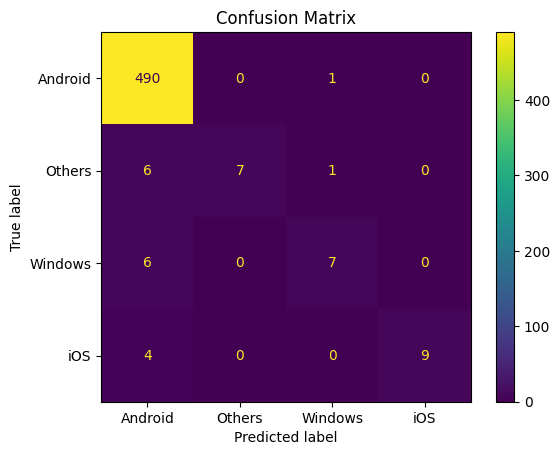

In [391]:
cm2 = confusion_matrix(y_test, ada_pred2)

disp = ConfusionMatrixDisplay(cm2, display_labels=np.unique(y_test) )

disp.plot()
plt.title('Confusion Matrix')
plt.show()
